Top features from Random Forest: ['PC1', 'PC2', 'PC4', 'PC6', 'PC7']


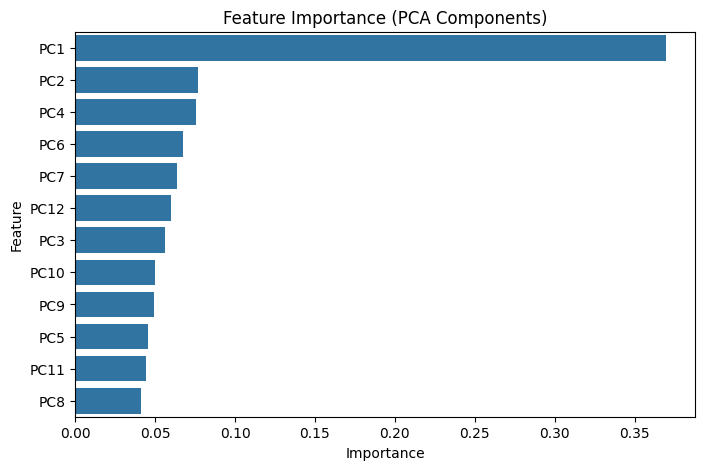

Top features from RFE: ['PC1', 'PC2', 'PC4', 'PC9', 'PC12']
Final selected features for modeling: ['PC9', 'PC7', 'PC4', 'PC12', 'PC1', 'PC2', 'PC6']
✅ Saved reduced dataset: heart_disease_selected.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# --------------------------
# Load PCA dataset
# --------------------------
df = pd.read_csv("../data/heart_disease_pca.csv")

X = df.drop("target", axis=1)
y = df["target"]

# --------------------------
# 1. Random Forest Importance
# --------------------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

top_rf_features = importance_df["Feature"].head(5).tolist()
print("Top features from Random Forest:", top_rf_features)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance (PCA Components)")
plt.show()

# --------------------------
# 2. Recursive Feature Elimination (RFE)
# --------------------------
model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

top_rfe_features = X.columns[rfe.support_].tolist()
print("Top features from RFE:", top_rfe_features)

# --------------------------
# Final Selected Features
# --------------------------
final_features = list(set(top_rf_features + top_rfe_features))
print("Final selected features for modeling:", final_features)

df_selected = df[final_features + ["target"]]
df_selected.to_csv("../data/heart_disease_selected.csv", index=False)
print("✅ Saved reduced dataset: heart_disease_selected.csv")
